In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import astropy
import lightkurve as lk
from scipy.optimize import minimize
from lightkurve import search_lightcurvefile
from lightkurve import search_lightcurve

from astropy.table import Table, join, MaskedColumn, vstack, Column

import sys  
sys.path.append('/Users/Tobin/Dropbox/Stellar_Flares_Project/Lupita_Flare_Model/Llamaradas-Estelares/') #Edit this to your own file path
from Flare_model import flare_model

import astropy.units as u

sys.path.append('/Users/Tobin/Dropbox/Stellar_Flares_Project/Getting_Started/')
import stella
from tqdm import tqdm_notebook
import os, sys

/Users/Tobin/opt/anaconda3/envs/Jim/lib/python3.11/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/Tobin/.lightkurve/cache. Please move all the files in the legacy directory /Users/Tobin/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(
2023-11-01 16:54:13.927297: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
lupita_tab=Table.read('lupita_tab_3.mrt', format='mrt')
lupita_tab

tpeak,FWHM,Amp,e_tpeak,e_FWHM,e_Amp,Source
d,d,,d,d,,
float64,float64,float64,str11,str11,float64,str6
539.6503088,0.00153389,0.008934698,6.49E-05,0.000213685,0.000716695,Kepler
539.8699037,0.000956397,0.01223805,8.61E-05,0.000185378,0.00213297,Kepler
541.1449682,0.002426536,0.007813247,5.18E-05,0.000187954,0.00037484,Kepler
541.1731539,0.003951658,0.011726901,0.000102912,0.000339299,0.000683433,Kepler
541.232336,0.002343955,0.007293593,9.96E-05,0.000387419,0.000749956,Kepler
541.3260872,0.001301046,0.017883518,3.42E-05,0.000187823,0.001811018,Kepler
541.4104737,0.001688422,0.014237471,2.76E-05,0.000128146,0.000654098,Kepler
...,...,...,...,...,...,...


In [4]:
search = lk.search_lightcurve(target='tic272272592', mission='TESS', author='SPOC')

search.table["dataURL"] = search.table["dataURI"]
lc = search[0].download()
lc

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1683.356329766784,1.9468701e+03,8.7976570e+00,2.4095550e-03,328247,566.33523,570.45488,1.3651268e+03,5.9396706e+00,5.6917944e+02,2.1164272e+00,1.9468701e+03,8.7976570e+00,0,———,———,———,———,566.33523,2.7542617e-03,570.45488,2.0828715e-03,-1.7108096e-02,-4.3766797e-02
1683.3577186720775,1.9299634e+03,8.7823038e+00,2.4095720e-03,328248,566.33728,570.45469,1.3525782e+03,5.9293046e+00,5.7010577e+02,2.1212642e+00,1.9299634e+03,8.7823038e+00,0,———,———,———,———,566.33728,2.7727359e-03,570.45469,2.0978455e-03,-1.5412442e-02,-4.4033464e-02
1683.3591075773713,1.9334449e+03,8.8197975e+00,2.4095890e-03,328249,566.33384,570.45563,1.3545961e+03,5.9546180e+00,5.7133252e+02,2.1255682e+00,1.9334449e+03,8.8197975e+00,0,———,———,———,———,566.33384,2.7848731e-03,570.45563,2.1042184e-03,-1.8401027e-02,-4.5030199e-02
1683.3604964826643,1.9438646e+03,8.7917938e+00,2.4096060e-03,328250,566.33293,570.45392,1.3611481e+03,5.9357119e+00,5.6872253e+02,2.1159327e+00,1.9438646e+03,8.7917938e+00,0,———,———,———,———,566.33293,2.7554927e-03,570.45392,2.0879700e-03,-2.0462021e-02,-4.8104279e-02
1683.361885387957,1.9368528e+03,8.8298349e+00,2.4096230e-03,328251,566.32816,570.45689,1.3573430e+03,5.9613953e+00,5.7186249e+02,2.1231835e+00,1.9368528e+03,8.8298349e+00,0,———,———,———,———,566.32816,2.7647624e-03,570.45689,2.1017159e-03,-2.0572454e-02,-4.0736653e-02
1683.3632742934835,1.9301345e+03,8.7978420e+00,2.4096402e-03,328252,566.33606,570.45494,1.3546990e+03,5.9397950e+00,5.6728296e+02,2.1208246e+00,1.9301345e+03,8.7978420e+00,0,———,———,———,———,566.33606,2.7888094e-03,570.45494,2.0993089e-03,-1.8326256e-02,-4.0484838e-02
1683.364663198777,1.9433376e+03,8.7990246e+00,2.4096572e-03,328253,566.32946,570.45587,1.3593098e+03,5.9405932e+00,5.6864221e+02,2.1161532e+00,1.9433376e+03,8.7990246e+00,0,———,———,———,———,566.32946,2.7641729e-03,570.45587,2.0918041e-03,-2.0811031e-02,-4.6844427e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [5]:
sector1_lc=lk.search_lightcurve(target='tic272272592', mission='TESS', author='SPOC')[0].download()

sector1_lc = sector1_lc[~np.isnan(sector1_lc.flux.value)]

sector1_lc

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1683.356329766784,1.9468701e+03,8.7976570e+00,2.4095550e-03,328247,566.33523,570.45488,1.3651268e+03,5.9396706e+00,5.6917944e+02,2.1164272e+00,1.9468701e+03,8.7976570e+00,0,———,———,———,———,566.33523,2.7542617e-03,570.45488,2.0828715e-03,-1.7108096e-02,-4.3766797e-02
1683.3577186720775,1.9299634e+03,8.7823038e+00,2.4095720e-03,328248,566.33728,570.45469,1.3525782e+03,5.9293046e+00,5.7010577e+02,2.1212642e+00,1.9299634e+03,8.7823038e+00,0,———,———,———,———,566.33728,2.7727359e-03,570.45469,2.0978455e-03,-1.5412442e-02,-4.4033464e-02
1683.3591075773713,1.9334449e+03,8.8197975e+00,2.4095890e-03,328249,566.33384,570.45563,1.3545961e+03,5.9546180e+00,5.7133252e+02,2.1255682e+00,1.9334449e+03,8.8197975e+00,0,———,———,———,———,566.33384,2.7848731e-03,570.45563,2.1042184e-03,-1.8401027e-02,-4.5030199e-02
1683.3604964826643,1.9438646e+03,8.7917938e+00,2.4096060e-03,328250,566.33293,570.45392,1.3611481e+03,5.9357119e+00,5.6872253e+02,2.1159327e+00,1.9438646e+03,8.7917938e+00,0,———,———,———,———,566.33293,2.7554927e-03,570.45392,2.0879700e-03,-2.0462021e-02,-4.8104279e-02
1683.361885387957,1.9368528e+03,8.8298349e+00,2.4096230e-03,328251,566.32816,570.45689,1.3573430e+03,5.9613953e+00,5.7186249e+02,2.1231835e+00,1.9368528e+03,8.8298349e+00,0,———,———,———,———,566.32816,2.7647624e-03,570.45689,2.1017159e-03,-2.0572454e-02,-4.0736653e-02
1683.3632742934835,1.9301345e+03,8.7978420e+00,2.4096402e-03,328252,566.33606,570.45494,1.3546990e+03,5.9397950e+00,5.6728296e+02,2.1208246e+00,1.9301345e+03,8.7978420e+00,0,———,———,———,———,566.33606,2.7888094e-03,570.45494,2.0993089e-03,-1.8326256e-02,-4.0484838e-02
1683.364663198777,1.9433376e+03,8.7990246e+00,2.4096572e-03,328253,566.32946,570.45587,1.3593098e+03,5.9405932e+00,5.6864221e+02,2.1161532e+00,1.9433376e+03,8.7990246e+00,0,———,———,———,———,566.32946,2.7641729e-03,570.45587,2.0918041e-03,-2.0811031e-02,-4.6844427e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


/Users/Tobin/Dropbox/Stellar_Flares_Project/Lupita_Flare_Model/Llamaradas-Estelares/Flare_model.py:21: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/Tobin/Dropbox/Stellar_Flares_Project/Lupita_Flare_Model/Llamaradas-Estelares/Flare_model.py:21: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/Tobin/Dropbox/Stellar_Flares_Project/Lupita_Flare_Model/Llamaradas-Estelares/Flare_model.py:23: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/Tobin/Dropbox/Stellar_Flares_Project/Lupita_Flare_Model/Llamaradas-Estelares/Flare_model.py:22: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2


(4.8, 5.05)

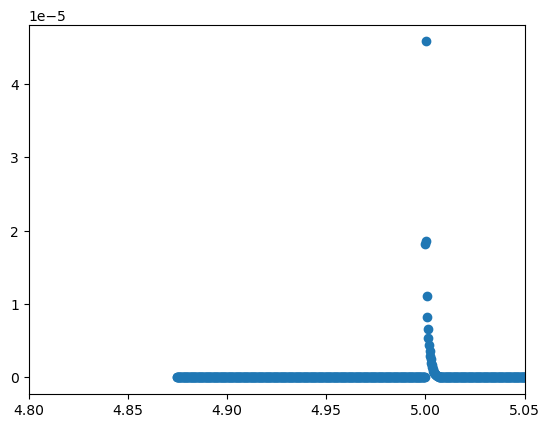

In [7]:
new_t_array=np.linspace(0,27, 100000)
new_t_array

flux=flare_model(new_t_array, 5, min(lupita_tab['FWHM']), .0001)

plt.scatter(new_t_array, flux)
plt.xlim(4.8,5.05)

In [6]:
import pickle

flare_info=pickle.load(open("/Users/Tobin/Dropbox/Stellar_Flares_Project/Getting_Started/Energies_and_rates.pkl", 'rb'))

sector1_flare_starts=flare_info['Flare_Starts'][0]
sector1_flare_stops=flare_info['Flare_Stops'][0]

sector1_bool=flare_info['Flare_Bool'][0]

In [7]:
sector1_lc['time'][sector1_bool].value

array([1684.1285606 , 1684.12994951, 1684.13133841, 1684.13272731,
       1684.62439919, 1684.62578809, 1684.62717699, 1684.6285659 ,
       1685.37579585, 1685.37718475, 1685.37857365, 1685.37996256,
       1685.38135146, 1685.38274036, 1685.38412927, 1685.38551817,
       1685.38690707, 1685.44246319, 1685.4438521 , 1685.445241  ,
       1685.4466299 , 1685.44801881, 1685.44940771, 1685.45079661,
       1685.45218552, 1685.45357442, 1685.45496332, 1685.45635223,
       1685.45774113, 1685.45913003, 1685.46051893, 1685.46190784,
       1685.46329674, 1685.46468564, 1685.46607455, 1685.46746345,
       1685.46885235, 1685.47024126, 1685.47163016, 1685.47301906,
       1685.47440796, 1685.47579687, 1685.47718577, 1685.66468768,
       1685.66607658, 1685.66746548, 1685.66885439, 1685.67024329,
       1685.67163219, 1685.6730211 , 1685.67441   , 1685.6757989 ,
       1686.5619189 , 1686.5633078 , 1686.5646967 , 1686.56608561,
       1686.56747451, 1686.56886341, 1686.57025232, 1686.57164

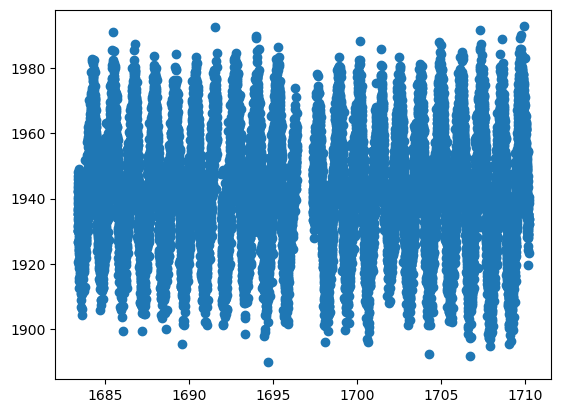

In [8]:
plt.scatter(sector1_lc['time'][~sector1_bool].value, sector1_lc['flux'][~sector1_bool].value)

In [9]:
lupita_tab[lupita_tab['FWHM'] == max(lupita_tab['FWHM'])]

tpeak,FWHM,Amp,e_tpeak,e_FWHM,e_Amp,Source
d,d,,d,d,,
float64,float64,float64,str11,str11,float64,str6
1730.399762,0.015213421,0.006633759,0.000668421,0.002348575,0.000634319,TESS


In [10]:
lupita_tab[lupita_tab['Amp'] == max(lupita_tab['Amp'])]

tpeak,FWHM,Amp,e_tpeak,e_FWHM,e_Amp,Source
d,d,,d,d,,
float64,float64,float64,str11,str11,float64,str6
1222.579268,0.001326548,0.47762537,2.23E-05,9.40E-05,0.024615462,Kepler


/Users/Tobin/Dropbox/Stellar_Flares_Project/Lupita_Flare_Model/Llamaradas-Estelares/Flare_model.py:23: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/Tobin/Dropbox/Stellar_Flares_Project/Lupita_Flare_Model/Llamaradas-Estelares/Flare_model.py:22: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2


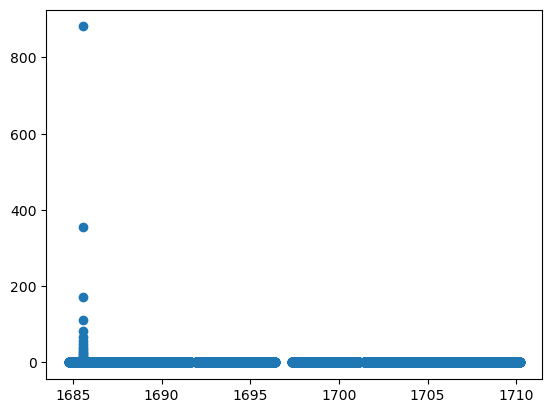

In [11]:
#insert one big flare

model_flare_flux=flare_model(sector1_lc['time'][~sector1_bool].value, sector1_lc['time'][~sector1_bool].value[1500], 
                             lupita_tab[lupita_tab['Amp'] == max(lupita_tab['Amp'])]['FWHM'], 
                             lupita_tab[lupita_tab['Amp'] == max(lupita_tab['Amp'])]['Amp']*np.median(sector1_lc.flux.value))

plt.scatter(sector1_lc['time'][~sector1_bool].value, model_flare_flux)
#plt.xlim(4.8,5.05)

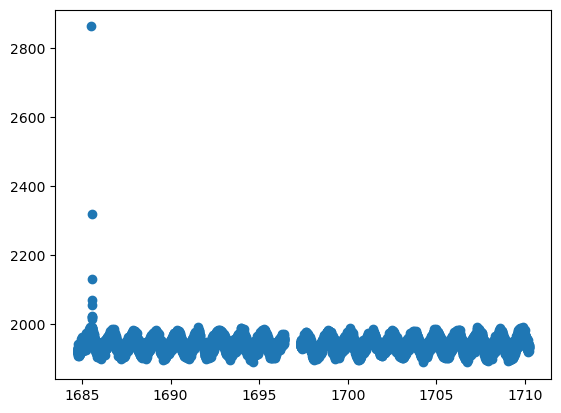

In [12]:
new_flux=model_flare_flux+sector1_lc[~sector1_bool].flux.value

plt.scatter(sector1_lc['time'][~sector1_bool].value, new_flux)

In [13]:
#Run Stella on this new flux array

OUT_DIR='/Users/Tobin/Dropbox/Stellar_Flares_Project/Getting Started/Results/'

cnn = stella.ConvNN(output_dir=OUT_DIR)

from stella.download_nn_set import DownloadSets

ds = DownloadSets()
ds.download_models()

MODELS=ds.models

Can only use stella.ConvNN.predict().
Models have already been downloaded to ~/.stella/models


In [14]:
cnn.predict(modelname='/Users/Tobin/.stella/models/hlsp_stella_tess_ensemblemodel_s000_tess_v0.1.0_cnn.h5',
            times=sector1_lc['time'][~sector1_bool].value,
            fluxes=new_flux,
            errs=sector1_lc['flux_err'][~sector1_bool].value)
single_pred = cnn.predictions[0]

  0%|                                  | 0/1 [00:00<?, ?it/s]

515/515 [==============================] - 1s 2ms/step


100%|██████████████████████████| 1/1 [00:01<00:00,  1.64s/it]


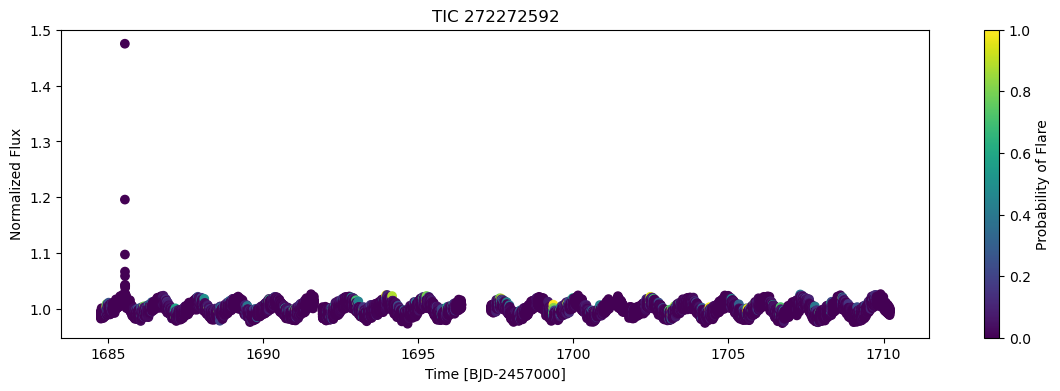

In [45]:
plt.figure(figsize=(14,4))
plt.scatter(cnn.predict_time[0], cnn.predict_flux[0],
            c=single_pred, vmin=0, vmax=1)
plt.colorbar(label='Probability of Flare')
plt.xlabel('Time [BJD-2457000]')
plt.ylabel('Normalized Flux')
plt.title('TIC {}'.format(lc.targetid))
plt.show()

In [15]:
preds = np.zeros((len(MODELS),len(cnn.predictions[0])))

for i, model in enumerate(MODELS):
    cnn.predict(modelname=model,
            times=sector1_lc['time'][~sector1_bool].value,
            fluxes=new_flux,
            errs=sector1_lc['flux_err'][~sector1_bool].value)
    preds[i] = cnn.predictions[0]

avg_pred = np.nanmedian(preds, axis=0)


  0%|                                  | 0/1 [00:00<?, ?it/s]

515/515 [==============================] - 1s 2ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

515/515 [==============================] - 1s 2ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

515/515 [==============================] - 1s 2ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

515/515 [==============================] - 1s 2ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

515/515 [==============================] - 1s 2ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

515/515 [==============================] - 1s 2ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

515/515 [==============================] - 1s 2ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

515/515 [==============================] - 1s 2ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

515/515 [==============================] - 1s 2ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

515/515 [==============================] - 1s 2ms/step


100%|██████████████████████████| 1/1 [00:01<00:00,  1.43s/it]


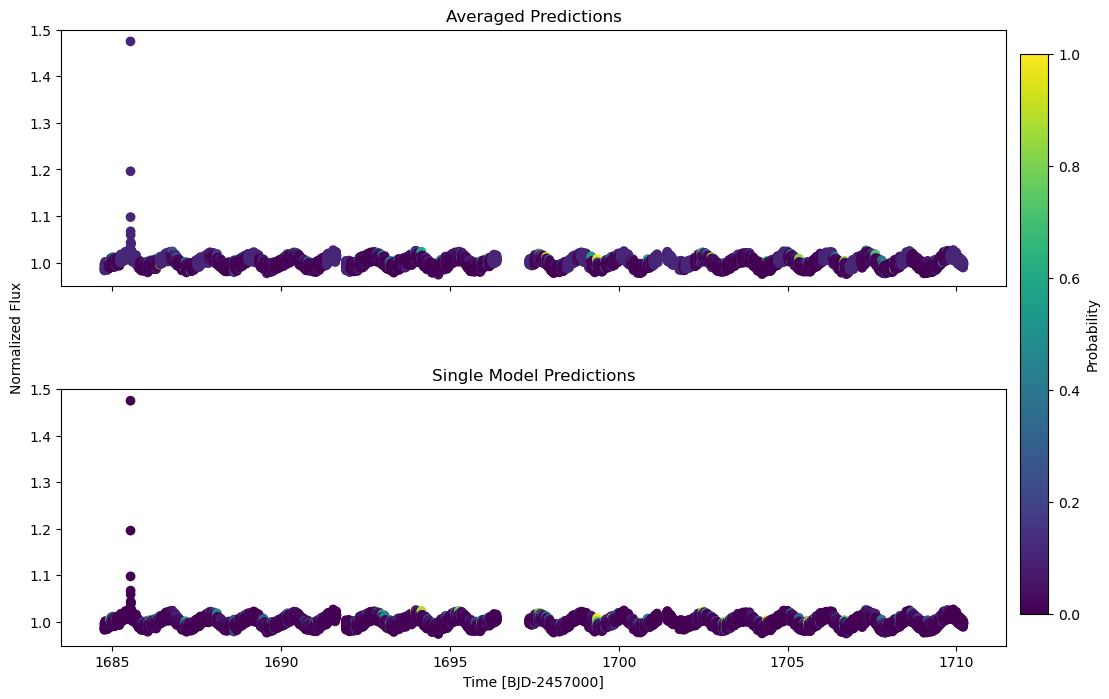

In [16]:
fig, (ax1, ax2) = plt.subplots(figsize=(14,8), nrows=2,
                               sharex=True, sharey=True)
im = ax1.scatter(cnn.predict_time[0], cnn.predict_flux[0],
            c=avg_pred, vmin=0, vmax=1)
ax2.scatter(cnn.predict_time[0], cnn.predict_flux[0],
            c=single_pred, vmin=0, vmax=1)
ax2.set_xlabel('Time [BJD-2457000]')
ax2.set_ylabel('Normalized Flux', y=1.2)


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Probability')


ax1.set_title('Averaged Predictions')
ax2.set_title('Single Model Predictions')

plt.subplots_adjust(hspace=0.4)
plt.show()

In [ ]:
# I didn't recover the flare... I'm going to make it a little wider and see what happens

In [31]:
lupita_tab[lupita_tab['Amp'] == max(lupita_tab['Amp'])]['FWHM']

0.001326548


/Users/Tobin/Dropbox/Stellar_Flares_Project/Lupita_Flare_Model/Llamaradas-Estelares/Flare_model.py:23: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/Tobin/Dropbox/Stellar_Flares_Project/Lupita_Flare_Model/Llamaradas-Estelares/Flare_model.py:22: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2


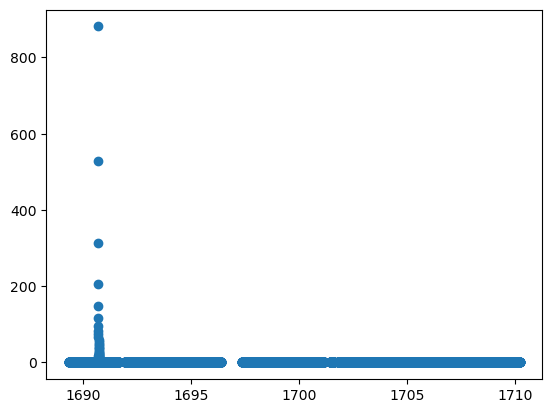

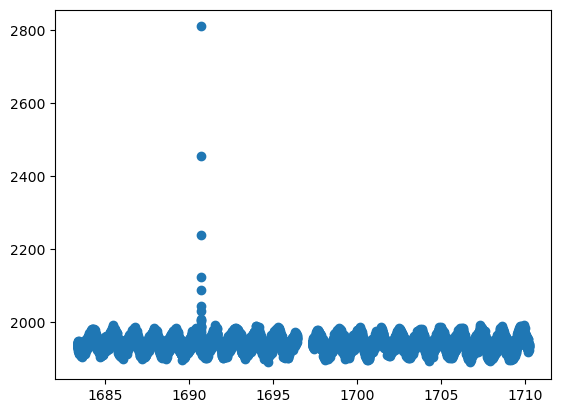

In [44]:

model_flare_flux=flare_model(sector1_lc['time'][~sector1_bool].value, sector1_lc['time'][~sector1_bool].value[5000], 
                             lupita_tab[lupita_tab['Amp'] == max(lupita_tab['Amp'])]['FWHM']+0.001, 
                             lupita_tab[lupita_tab['Amp'] == max(lupita_tab['Amp'])]['Amp']*np.median(sector1_lc.flux.value))

plt.scatter(sector1_lc['time'][~sector1_bool].value, model_flare_flux)
plt.show()

model_flare_flux[np.isnan(model_flare_flux)]

fixed_mask=np.ma.filled(model_flare_flux, fill_value=0)

new_flux=fixed_mask+sector1_lc[~sector1_bool].flux.value

plt.scatter(sector1_lc['time'][~sector1_bool].value, new_flux)
plt.show()

In [45]:
preds = np.zeros((len(MODELS),len(sector1_lc['time'][~sector1_bool])))

for i, model in enumerate(MODELS):
    cnn.predict(modelname=model,
            times=sector1_lc['time'][~sector1_bool].value,
            fluxes=new_flux,
            errs=sector1_lc['flux_err'][~sector1_bool].value)
    preds[i] = cnn.predictions[0]

avg_pred = np.nanmedian(preds, axis=0)

  0%|                                  | 0/1 [00:00<?, ?it/s]

546/546 [==============================] - 2s 3ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

546/546 [==============================] - 1s 2ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

546/546 [==============================] - 2s 3ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

546/546 [==============================] - 2s 3ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

546/546 [==============================] - 2s 3ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

546/546 [==============================] - 2s 3ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

546/546 [==============================] - 1s 3ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

546/546 [==============================] - 1s 2ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

546/546 [==============================] - 2s 3ms/step


  0%|                                  | 0/1 [00:00<?, ?it/s]

546/546 [==============================] - 1s 2ms/step


100%|██████████████████████████| 1/1 [00:01<00:00,  1.66s/it]


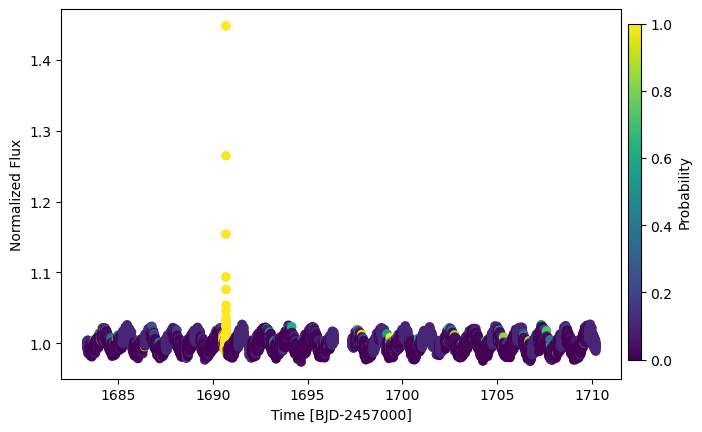

In [46]:
fig=plt.figure()
plt.scatter(cnn.predict_time[0], cnn.predict_flux[0],
            c=avg_pred, vmin=0, vmax=1)
plt.xlabel('Time [BJD-2457000]')
plt.ylabel('Normalized Flux')


cbar_ax = fig.add_axes([1.01, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Probability')

fig.subplots_adjust(right=1)